# Importing of some basic library that will be used in this project

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
%matplotlib inline

# Importing of the dataset from excel file in csv format

In [25]:
df = pd.read_csv("C:/Users/hp/Desktop/data/ADVERTISING/Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# Checking for the total number of rows and columns

In [26]:
df.shape

(200, 5)

# Checking for missing value in the given datasets

In [27]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

# Name of the columns in the given datasets

In [28]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

# Cleaning of the given dataset  

In [29]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [30]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### The column of Unamed : 0 is drop because it has less important in the determination of our sales 

# EXPLORATORY DATA ANALYSIS

In [31]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [32]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


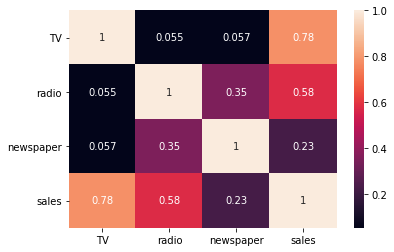

In [34]:
sns.heatmap(df.corr(), annot=True)
plt.show()

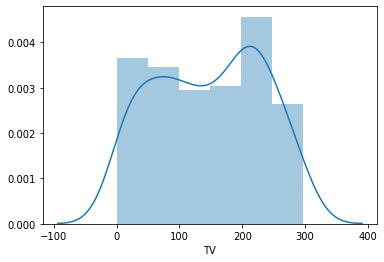

In [36]:
sns.distplot(df.TV)
plt.show()

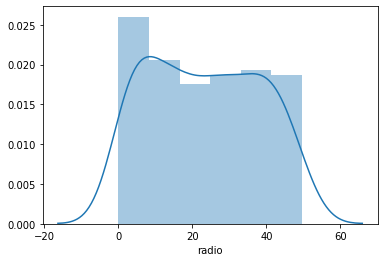

In [37]:
sns.distplot(df.radio)
plt.show()

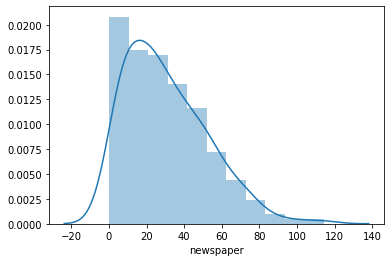

In [38]:
sns.distplot(df.newspaper)
plt.show()

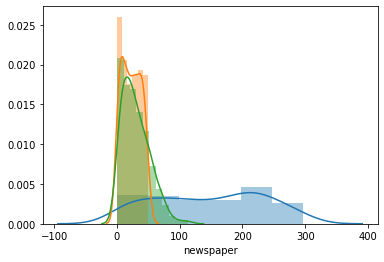

In [39]:
sns.distplot(df.TV)
sns.distplot(df.radio)
sns.distplot(df.newspaper)
plt.show()

## Showing the linear regression of the TV, radio and newspaper with respect to sales 

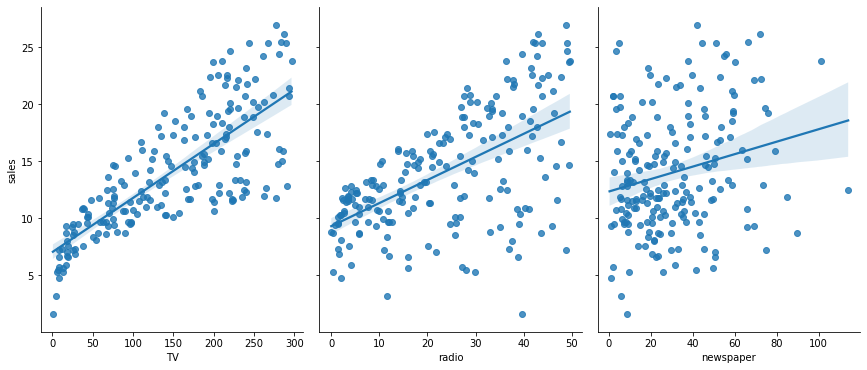

In [42]:
sns.pairplot(df, x_vars=['TV', 'radio', 'newspaper',], y_vars='sales', height=5, aspect=0.8, kind="reg")
plt.show()

## With the above result we can see clearly that
### (1) Tv will have the highest sales 
### (2) radio will have higher sales 
### (3) newspaper will have high sales 

In [43]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

## Sales in the given dataset is our indepent variable and is what we are trying to predict which is our output and our TV, radio, newspaper is the dependent variable  which is on the x-axis and sales the independent variable which is on the x-axis 

In [46]:
x = df.drop(["sales"], axis="columns")
x.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [47]:
y = df.drop(["TV","radio","newspaper"], axis="columns")
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


# Building a machine learning model of LinearRegression for the given datasets

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import random

In [49]:
LnR = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0, test_size=0.20)

In [50]:
LnR.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
print("x_train shape: ", x_train.shape, " x_test shape: ", x_test.shape, " y_train shape: ", y_train.shape, " y_test shape: ", y_test.shape)

x_train shape:  (160, 3)  x_test shape:  (40, 3)  y_train shape:  (160, 1)  y_test shape:  (40, 1)


# Evaluating the model 

In [52]:
y_pred = LnR.predict(x_test)

In [54]:
y_pred[1:10]

array([[ 7.4522807 ],
       [ 7.0197076 ],
       [24.08029725],
       [12.01786259],
       [ 6.53793858],
       [12.78286918],
       [15.10974587],
       [10.76974013],
       [16.34357951]])

In [55]:
# predicted value and the real value
y_test.head()

,sales
18,11.3
170,8.4
107,8.7
98,25.4
177,11.7


## To calculate the error in the model build for the given dataset

In [56]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))

1.3617813502090272
